In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
def createM(filename):
    data = pd.read_csv(filename,header=None,sep=' ')
    data.columns = ['n1', 'n2', 'timestamp']
    M = nx.from_pandas_dataframe(data,'n1','n2',edge_attr='timestamp', create_using=nx.MultiGraph())
    return M

In [3]:
# create weighted graph from Multigraph
def Mg2Wg(M):
    G = nx.Graph()
    for u,v,data in M.edges_iter(data=True):
        if G.has_edge(u,v):
            G[u][v]['weight'] += 1
        else:
            G.add_edge(u, v, weight=1)
    return G


In [23]:
M = createM('./data/High-School_data.txt')
origin = nx.average_clustering(Mg2Wg(M))
print '原始网络的平均聚类系数:',origin

原始网络的平均聚类系数: 0.503504819173


In [24]:
M = createM('./data/edges_swap_0k.txt')
edges_swap_0k = nx.average_clustering(Mg2Wg(M))
print '0阶置乱网络的平均聚类系数:',edges_swap_0k

0阶置乱网络的平均聚类系数: 0.119382559876


In [26]:
M = createM('./data/edges_swap_1k.txt')
edges_swap_1k = nx.average_clustering(Mg2Wg(M))
print '1阶置乱网络的平均聚类系数:',edges_swap_1k

1阶置乱网络的平均聚类系数: 0.503358357072


In [31]:
M = createM('./data/KeepDayMode.txt')
KeepDayMode = nx.average_clustering(Mg2Wg(M))
print 'KeepDayMode置乱网络的平均聚类系数:',KeepDayMode

KeepDayMode置乱网络的平均聚类系数: 0.0


In [32]:
M = createM('./data/KeepWeekMode.txt')
KeepWeekMode = nx.average_clustering(Mg2Wg(M))
print 'KeepWeekMode置乱网络的平均聚类系数:',KeepWeekMode

KeepWeekMode置乱网络的平均聚类系数: 0.503504819173


In [33]:
M = createM('./data/KeepMonthMode.txt')
KeepMonthMode = nx.average_clustering(Mg2Wg(M))
print 'KeepMonthMode置乱网络的平均聚类系数:',KeepMonthMode

KeepMonthMode置乱网络的平均聚类系数: 0.503504819173


In [39]:
M = createM('./data/timeweight_swap.txt')
timeweight_swap = nx.average_clustering(Mg2Wg(M))
print '时权置乱网络的平均聚类系数:',timeweight_swap

时权置乱网络的平均聚类系数: 0.503504819173


In [34]:
M = createM('./data/sametimeweight_swap.txt')
sametimeweight_swap = nx.average_clustering(Mg2Wg(M))
print '等时权置乱网络的平均聚类系数:',sametimeweight_swap

等时权置乱网络的平均聚类系数: 0.503504819173


In [38]:
M = createM('./data/time_swap.txt')
time_swap = nx.average_clustering(Mg2Wg(M))
print '时间置乱网络的平均聚类系数:',time_swap

时间置乱网络的平均聚类系数: 0.503358357072


In [35]:
M = createM('./data/time_random.txt')
time_randomcreate = nx.average_clustering(Mg2Wg(M))
print '时间随机化置乱网络的平均聚类系数:',time_randomcreate

时间随机化置乱网络的平均聚类系数: 0.503504819173


In [36]:
M = createM('./data/time_randomswap.txt')
touch_swap = nx.average_clustering(Mg2Wg(M))
print '接触置乱网络的平均聚类系数:',touch_swap

接触置乱网络的平均聚类系数: 0.503504819173


In [37]:
M = createM('./data/time_reverse.txt')
time_reverse = nx.average_clustering(Mg2Wg(M))
print '时间倒转置乱网络的平均聚类系数:',time_reverse

时间倒转置乱网络的平均聚类系数: 0.503504819173


In [43]:
d = {'origin':origin,
      'touch_swap':touch_swap,
      'time_random':time_randomcreate,
      'edges_swap_0k':edges_swap_0k,
      'edges_swap_1k':edges_swap_1k,
      'KeepDayMode':KeepDayMode,
      'KeepMonthMode':KeepMonthMode,
      'KeepWeekMode':KeepWeekMode,
      'sametimeweight_swap':sametimeweight_swap,
      'time_reverse':time_reverse,
      'time_swap':time_swap,
      'timeweight_swap':timeweight_swap}
df = pd.DataFrame(data=d.values(), index=d.keys())
df.columns = ['counts']
df = df.sort_values('counts')
df

,counts
KeepDayMode,0.000000
edges_swap_0k,0.119383
edges_swap_1k,0.503358
time_swap,0.503358
time_reverse,0.503505
origin,0.503505
KeepMonthMode,0.503505
timeweight_swap,0.503505
sametimeweight_swap,0.503505
touch_swap,0.503505


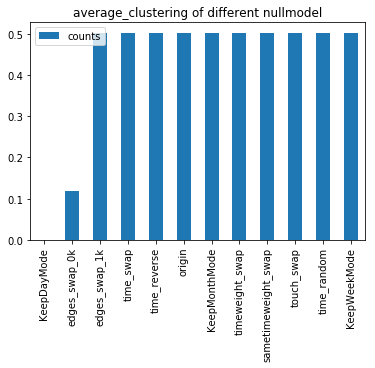

In [46]:
df.plot(kind='bar',rot=90)
plt.title('average_clustering of different nullmodel')

In [4]:
M = createM('./data/High-School_data.txt')
origin = nx.degree_assortativity_coefficient(Mg2Wg(M))
print '原始网络的匹配系数:',origin

原始网络的匹配系数: 0.033175769936


In [5]:
M = createM('./data/edges_swap_0k.txt')
edges_swap_0k = nx.degree_assortativity_coefficient(Mg2Wg(M))
print '0阶置乱网络的匹配系数:',edges_swap_0k

0阶置乱网络的匹配系数: 0.0140865413156


In [6]:
M = createM('./data/edges_swap_1k.txt')
edges_swap_1k = nx.degree_assortativity_coefficient(Mg2Wg(M))
print '1阶置乱网络的匹配系数:',edges_swap_1k

1阶置乱网络的匹配系数: 0.033050069494


In [7]:
M = createM('./data/KeepDayMode.txt')
KeepDayMode = nx.degree_assortativity_coefficient(Mg2Wg(M))
print 'KeepDayMode置乱网络的匹配系数:',KeepDayMode

KeepDayMode置乱网络的匹配系数: -0.0075723830735


In [9]:
M = createM('./data/KeepMonthMode.txt')
KeepMonthMode = nx.degree_assortativity_coefficient(Mg2Wg(M))
print 'KeepMonthMode置乱网络的匹配系数:',KeepMonthMode

KeepMonthMode置乱网络的匹配系数: 0.033175769936


In [10]:
M = createM('./data/KeepWeekMode.txt')
KeepWeekMode = nx.degree_assortativity_coefficient(Mg2Wg(M))
print 'KeepWeekMode置乱网络的匹配系数:',KeepWeekMode

KeepWeekMode置乱网络的匹配系数: 0.033175769936


In [11]:
M = createM('./data/timeweight_swap.txt')
timeweight_swap = nx.degree_assortativity_coefficient(Mg2Wg(M))
print 'timeweight_swap置乱网络的匹配系数:',timeweight_swap

timeweight_swap置乱网络的匹配系数: 0.033175769936


In [12]:
M = createM('./data/sametimeweight_swap.txt')
sametimeweight_swap = nx.degree_assortativity_coefficient(Mg2Wg(M))
print '等时权置乱网络的匹配系数:',sametimeweight_swap

等时权置乱网络的匹配系数: 0.033175769936


In [13]:
M = createM('./data/time_swap.txt')
time_swap = nx.degree_assortativity_coefficient(Mg2Wg(M))
print '时间置乱网络的匹配系数:',time_swap

时间置乱网络的匹配系数: 0.033050069494


In [14]:
M = createM('./data/time_random.txt')
time_randomcreate = nx.degree_assortativity_coefficient(Mg2Wg(M))
print '时间随机化置乱网络的匹配系数:',time_randomcreate

时间随机化置乱网络的匹配系数: 0.033175769936


In [15]:
M = createM('./data/time_randomswap.txt')
touch_swap = nx.degree_assortativity_coefficient(Mg2Wg(M))
print '接触置乱网络的匹配系数:',touch_swap

接触置乱网络的匹配系数: 0.033175769936


In [16]:
M = createM('./data/time_reverse.txt')
time_reverse = nx.degree_assortativity_coefficient(Mg2Wg(M))
print '时间倒转置乱网络的匹配系数:',time_reverse

时间倒转置乱网络的匹配系数: 0.033175769936


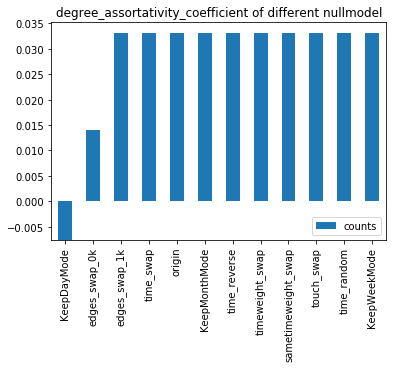

In [18]:
d = {'origin':origin,
      'touch_swap':touch_swap,
      'time_random':time_randomcreate,
      'edges_swap_0k':edges_swap_0k,
      'edges_swap_1k':edges_swap_1k,
      'KeepDayMode':KeepDayMode,
      'KeepMonthMode':KeepMonthMode,
      'KeepWeekMode':KeepWeekMode,
      'sametimeweight_swap':sametimeweight_swap,
      'time_reverse':time_reverse,
      'time_swap':time_swap,
      'timeweight_swap':timeweight_swap}
df = pd.DataFrame(data=d.values(), index=d.keys())
df.columns = ['counts']
df = df.sort_values('counts')
df.plot(kind='bar',rot=90)
plt.title('degree_assortativity_coefficient of different nullmodel')

In [19]:
M = createM('./data/High-School_data.txt')
origin = nx.average_shortest_path_length(Mg2Wg(M))
print '原始网络的平均最短路径:',origin

原始网络的平均最短路径: 2.15943415696


In [21]:
M = createM('./data/edges_swap_0k.txt')
edges_swap_0k = nx.average_shortest_path_length(Mg2Wg(M))
print '0阶置乱网络的平均最短路径:',edges_swap_0k

0阶置乱网络的平均最短路径: 1.92328474137


In [22]:
M = createM('./data/edges_swap_1k.txt')
edges_swap_1k = nx.average_shortest_path_length(Mg2Wg(M))
print '1阶置乱网络的平均最短路径:',edges_swap_1k

1阶置乱网络的平均最短路径: 2.15947167971


In [32]:
M = createM('./data/KeepDayMode.txt')
M = max(nx.connected_component_subgraphs(Mg2Wg(M)), key=len)
KeepDayMode = nx.average_shortest_path_length(M)
print 'KeepDayMode置乱网络的平均最短路径:',KeepDayMode

KeepDayMode置乱网络的平均最短路径: 2.88888888889


In [33]:
M = createM('./data/KeepMonthMode.txt')
M = max(nx.connected_component_subgraphs(Mg2Wg(M)), key=len)
KeepMonthMode = nx.average_shortest_path_length(M)
print 'KeepMonthMode置乱网络的平均最短路径:',KeepMonthMode

KeepMonthMode置乱网络的平均最短路径: 2.15943415696


In [34]:
M = createM('./data/KeepWeekMode.txt')
M = max(nx.connected_component_subgraphs(Mg2Wg(M)), key=len)
KeepWeekMode = nx.average_shortest_path_length(M)
print 'KeepWeekMode置乱网络的平均最短路径:',KeepWeekMode

KeepWeekMode置乱网络的平均最短路径: 2.15943415696


In [35]:
M = createM('./data/timeweight_swap.txt')
M = max(nx.connected_component_subgraphs(Mg2Wg(M)), key=len)
timeweight_swap = nx.average_shortest_path_length(M)
print 'timeweight_swap置乱网络的平均最短路径:',timeweight_swap

timeweight_swap置乱网络的平均最短路径: 2.15943415696


In [36]:
M = createM('./data/sametimeweight_swap.txt')
M = max(nx.connected_component_subgraphs(Mg2Wg(M)), key=len)
sametimeweight_swap = nx.average_shortest_path_length(M)
print 'sametimeweight_swap置乱网络的平均最短路径:',sametimeweight_swap

sametimeweight_swap置乱网络的平均最短路径: 2.15943415696


In [37]:
M = createM('./data/time_swap.txt')
M = max(nx.connected_component_subgraphs(Mg2Wg(M)), key=len)
time_swap = nx.average_shortest_path_length(M)
print 'time_swap置乱网络的平均最短路径:',time_swap

time_swap置乱网络的平均最短路径: 2.15947167971


In [38]:
M = createM('./data/time_random.txt')
M = max(nx.connected_component_subgraphs(Mg2Wg(M)), key=len)
time_random = nx.average_shortest_path_length(M)
print 'time_random置乱网络的平均最短路径:',time_random

time_random置乱网络的平均最短路径: 2.15943415696


In [39]:
M = createM('./data/time_randomswap.txt')
M = max(nx.connected_component_subgraphs(Mg2Wg(M)), key=len)
time_randomswap = nx.average_shortest_path_length(M)
print 'time_randomswap置乱网络的平均最短路径:',time_randomswap

time_randomswap置乱网络的平均最短路径: 2.15943415696


In [40]:
M = createM('./data/time_reverse.txt')
M = max(nx.connected_component_subgraphs(Mg2Wg(M)), key=len)
time_reverse = nx.average_shortest_path_length(M)
print 'time_reverse置乱网络的平均最短路径:',time_reverse

time_reverse置乱网络的平均最短路径: 2.15943415696


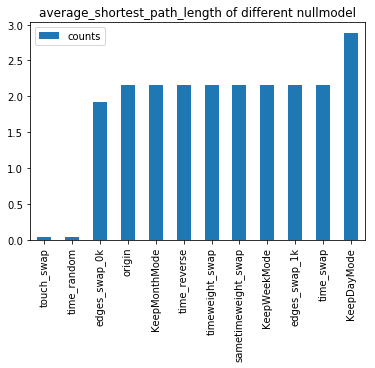

In [41]:
d = {'origin':origin,
      'touch_swap':touch_swap,
      'time_random':time_randomcreate,
      'edges_swap_0k':edges_swap_0k,
      'edges_swap_1k':edges_swap_1k,
      'KeepDayMode':KeepDayMode,
      'KeepMonthMode':KeepMonthMode,
      'KeepWeekMode':KeepWeekMode,
      'sametimeweight_swap':sametimeweight_swap,
      'time_reverse':time_reverse,
      'time_swap':time_swap,
      'timeweight_swap':timeweight_swap}
df = pd.DataFrame(data=d.values(), index=d.keys())
df.columns = ['counts']
df = df.sort_values('counts')
df.plot(kind='bar',rot=90)
plt.title('average_shortest_path_length of different nullmodel')